# Paso 11. Navier-Stokes, flujo en una cavidad.

Recordemos la forma no dimensional de las ecuaciones de Navier-Stokes.

$$
\frac{D\vec{V}}{Dt} = -\frac{1}{\rho} \nabla P + \nu \nabla^2 \vec{V} + G
$$
Donde $\vec{V} = \Big( v_1(x,y), v_2(x,y), ... , v_n(x,y) \Big)$ y asumimos $G = 0$

En este problema tomamremos $G = 0$ y nos limitamres al caso $\mathbb{R}^2$

$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = 
-\frac{1}{\rho}\frac{\partial p}{\partial x} + \nu \Bigg( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \Bigg)
$$

$$
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = 
-\frac{1}{\rho}\frac{\partial p}{\partial y} + \nu \Bigg( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \Bigg)
$$

$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = 
-\rho\left(
 \frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+
2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+
 \frac{\partial v}{\partial y}\frac{\partial v}{\partial y}-
\right)
$$

#### Discretización

Para el eje x:
$$
\frac{u(i,j)_{n+1} - u(i,j)_n}{\Delta t} + 
u(i,j)_n\frac{u(i,j)_n - u(i-1,j)_n}{\Delta x} +
v(i,j)_n\frac{u(i,j)_n - u(i-1,j)_n}{\Delta y} =\\
-\frac{1}{\rho} \frac{p(i,j)_{n+1} - p(i,j)_{n-1}}{2\Delta x} + 
\nu \Bigg( 
\frac{u(i+1,j)_n - 2u(i,j)_n + u(i-1,j)_n}{\Delta x^2} +
\frac{u(i,j+1)_n - 2u(i,j)_n + u(i,j-1)_n}{\Delta y^2}
\Bigg)
$$

Para el eje y:
$$
\frac{v(i,j)_{n+1} - v(i,j)_n}{\Delta t} + 
u(i,j)_n\frac{v(i,j)_n - v(i-1,j)_n}{\Delta x} +
v(i,j)_n\frac{v(i,j)_n - v(i-1,j)_n}{\Delta y} =\\
-\frac{1}{\rho} \frac{p(i,j)_{n+1} - p(i,j)_{n-1}}{2\Delta x} + 
\nu \Bigg( 
\frac{v(i+1,j)_n - 2v(i,j)_n + v(i-1,j)_n}{\Delta x^2} +
\frac{v(i,j+1)_n - 2v(i,j)_n + v(i,j-1)_n}{\Delta y^2}
\Bigg)
$$

Para la ecuación de la presión:
$$
\frac{p(i+1,j)_n - 2p(i,j)_n + p(i-1,j)_n}{\Delta x^2} + \frac{p(i,j+1)_n - 2p(i,j)_n + p(i,j-1)_n}{\Delta y^2} = \\
-\rho \Bigg[
\frac{1}{\Delta t} \Bigg(  \frac{u(i+1,j)_n - u(i-1,j)_n}{2\Delta x} + \frac{v(i,j+1)_n - v(i,j-1)_n}{2\Delta y} \Bigg) \\
-\Bigg( \frac{u(i+1,j)_n - u(i-1,j)_n}{2\Delta x} \Bigg)^2 \\
+2\frac{u(i,j+1)_n - u(i,j-1)_n}{2\Delta y}\frac{v(i+1,j)_n - v(i-1,j)_n}{2\Delta x} \\
-\Bigg( \frac{v(i,j+1)_n - v(i,j-1)_n}{2\Delta y} \Bigg)^2
\Bigg]
$$


Despejando para $u(i,j)_{n+1}$, $v(i,j)_{n+1}$, $p(i,j)_n$:

$$
u(i,j)_{n+1} = u(i,j)_n - 
u(i,j)_n\frac{\Delta t}{\Delta x} \Big[u(i,j)_n-u(i-1,j)_n \Big] -
v(i,j)_n\frac{\Delta t}{\Delta y} \Big[u(i,j)_n-u(i,j-1)_n \Big] \\
-\frac{\Delta t}{2 \rho \Delta x} \Big[p(i+1,j)_n-p(i-1,j)_n\Big] \\
+\nu \Bigg[
\frac{\Delta t}{\Delta x^2} \big[ u(i+1,j)_n -2u(i,j)_n + u(i-1,j)_n \big] \\
+\frac{\Delta t}{\Delta y^2} \big[ u(i,j+1)_n -2u(i,j)_n + u(i,j-1)_n\big]
\Bigg]
$$

$$
v(i,j)_{n+1} = v(i,j)_n - 
u(i,j)_n\frac{\Delta t}{\Delta x} \Big[v(i,j)_n-v(i-1,j)_n \Big] -
v(i,j)_n\frac{\Delta t}{\Delta y} \Big[v(i,j)_n-v(i,j-1)_n \Big] \\
-\frac{\Delta t}{2 \rho \Delta x} \Big[p(i,j+1)_n-p(i,j-1)_n\Big] \\
+\nu \Bigg[
\frac{\Delta t}{\Delta x^2} \big[ v(i+1,j)_n -2v(i,j)_n + v(i-1,j)_n \big] \\
+\frac{\Delta t}{\Delta y^2} \big[ v(i,j+1)_n -2v(i,j)_n + v(i,j-1)_n\big]
\Bigg]
$$

$$
p(i,j)_n =\frac{\Delta y^2 \Big[p(i+1,j)_n+p(i-1,j)_n\Big] + \Delta x^2\Big[p(i,j+1)_n+p(i,j-1)_n\Big]}{2(\Delta x^2+\Delta y^2)} \\
-\frac{\rho\Delta x^2 \Delta y^2}{2(\Delta x^2+\Delta y^2)} \Bigg[ \\
\frac{1}{\Delta t}\left(\frac{u(i+1,j)_n-u(i-1,j)_n}{2\Delta x}+\frac{v(i,j+1)_n-v(i,j-1)_n}{2\Delta y}\right) \\
- \Bigg( \frac{u(i+1,j)_n-u(i-1,j)_n}{2\Delta x} \Bigg)^2 \\
- 2 \frac{u(i,j+1)_n-u(i,j-1)_n}{2\Delta x} \frac{v(i+1,j)_n-v(i-1,j)_n}{2\Delta y}\\
- \Bigg( \frac{v(i,j+1)_n-v(i,j-1)_n}{2\Delta y} \Bigg)^2
\Bigg]
$$

#### Condiciones iniciales y de frontera

Condiciones iniciales
\begin{eqnarray}
(x,y) \in [0,2] \times [0,2]\\
u(x,y) = v(x,y) = p(x,y) = 0 \\
\end{eqnarray}

Condiciones de frontera
\begin{eqnarray}
u(x,2) = 1 \\
u(x,0) = v(0,y) = v(2,y) = 0 \\
\frac{\partial p}{\partial y}(x,0) = 0 \\
p(x,2) = 0 \\
\frac{\partial p}{\partial x}(0,y) = \frac{\partial p}{\partial x}(2,y) = 0 
\end{eqnarray}

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def PresureStabilization(rho, p, u, v):
    
    for i in range(50):
        
        pn_im1_j = np.roll(p,  1, axis=1)[1:-1,1:-1];
        pn_im1_j = np.roll(p,  1, axis=1)[1:-1,1:-1];
        pn_ip1_j = np.roll(p, -1, axis=1)[1:-1,1:-1];
        pn_i_jm1 = np.roll(p,  1, axis=0)[1:-1,1:-1];
        pn_i_jp1 = np.roll(p, -1, axis=0)[1:-1,1:-1];
        
        un_im1_j = np.roll(u,  1, axis=1)[1:-1,1:-1];
        un_ip1_j = np.roll(u, -1, axis=1)[1:-1,1:-1];
        un_i_jm1 = np.roll(u,  1, axis=0)[1:-1,1:-1];
        un_i_jp1 = np.roll(u, -1, axis=0)[1:-1,1:-1];

        vn_im1_j = np.roll(v,  1, axis=1)[1:-1,1:-1];
        vn_ip1_j = np.roll(v, -1, axis=1)[1:-1,1:-1];
        vn_i_jm1 = np.roll(v,  1, axis=0)[1:-1,1:-1];
        vn_i_jp1 = np.roll(v, -1, axis=0)[1:-1,1:-1];
        
        
        p[1:-1,1:-1] = ((pn_ip1_j+pn_im1_j)*dy**2 + (pn_i_jp1+pn_i_jm1)*dx**2) / \
                    (2*(dx**2+dy**2)) -\
                    (rho*(dx**2)*(dy**2))/ (2*(dx**2+dy**2)) * \
                    ( 1/dt * ((un_ip1_j-un_im1_j)/(2*dx) + (vn_i_jp1-vn_i_jm1)/(2*dy)) -\
                      ((un_ip1_j-un_im1_j)/(2*dx))**2 -\
                      2*((un_i_jp1-un_i_jm1)/(2*dy)*(vn_ip1_j-vn_im1_j)/(2*dx)) -\
                      ((vn_i_jp1-vn_i_jm1)/(2*dy))**2 \
                    );
                
        p[-1,:] = p[-2,:] # dp/dy = 0 at y = 2
        p[0,:]  = p[1,:]  # dp/dy = 0 at y = 0
        p[:,0]  = p[:,1]  # dp/dx = 0 at x = 0
        p[:,-1] = 0       # p = 0 at x = 2
        
    return p;

def update(i, profile):
    #store the actual state of the arrays
    u_n = u;
    v_n = v;    
    p_n = p;

    p_n = PresureStabilization(rho, p, u, v);
    
    #update arrays, just for readability create dummy variables
    pn_im1_j = np.roll(p,  1, axis=1)[1:-1,1:-1];
    pn_ip1_j = np.roll(p, -1, axis=1)[1:-1,1:-1];
    pn_i_jm1 = np.roll(p,  1, axis=0)[1:-1,1:-1];
    pn_i_jp1 = np.roll(p, -1, axis=0)[1:-1,1:-1];
        
    un_i_j   = u_n[1:-1,1:-1];
    un_im1_j = np.roll(u,  1, axis=1)[1:-1,1:-1];
    un_ip1_j = np.roll(u, -1, axis=1)[1:-1,1:-1];
    un_i_jm1 = np.roll(u,  1, axis=0)[1:-1,1:-1];
    un_i_jp1 = np.roll(u, -1, axis=0)[1:-1,1:-1];
    
    vn_i_j   = v_n[1:-1,1:-1];
    vn_im1_j = np.roll(v,  1, axis=1)[1:-1,1:-1];
    vn_ip1_j = np.roll(v, -1, axis=1)[1:-1,1:-1];
    vn_i_jm1 = np.roll(v,  1, axis=0)[1:-1,1:-1];
    vn_i_jp1 = np.roll(v, -1, axis=0)[1:-1,1:-1];
    
    u[1:-1,1:-1] = un_i_j - \
                (un_i_j*(dt/dx)) * (un_i_j - un_im1_j) - \
                (vn_i_j*(dt/dy)) * (un_i_j - un_i_jm1) - \
                dt/(2*rho*dx)*( pn_ip1_j - pn_im1_j ) + \
                nu*(dt/dx**2)*( un_ip1_j - 2*un_i_j + un_im1_j ) + \
                nu*(dt/dy**2)*( un_i_jp1 - 2*un_i_j + un_i_jm1 );
        
    v[1:-1,1:-1] = vn_i_j - \
                (un_i_j*(dt/dx)) * (vn_i_j - vn_im1_j) - \
                (vn_i_j*(dt/dy)) * (vn_i_j - vn_i_jm1) - \
                dt/(2*rho*dy)*( pn_i_jp1 - pn_i_jm1 ) + \
                nu*(dt/dx**2)*( vn_ip1_j - 2*vn_i_j + vn_im1_j ) + \
                nu*(dt/dy**2)*( vn_i_jp1 - 2*vn_i_j + vn_i_jm1 );
    
    u[0,:]  = 0
    u[:,0]  = 0
    u[:,-1] = 0
    
    # Boundary for the velocity in the lid
    u[-1,:] = 1    
    
    v[0,:]  = 0
    v[-1,:] = 0
    v[:,0]  = 0
    v[:,-1] = 0
    
    ax.clear();

    profile = ax.contourf(X, Y, u, alpha=1.0)
    ax.contourf(X, Y, p, alpha=0.25)
    
    ax.quiver(X[::3,::3],Y[::3,::3],u[::3,::3],v[::3,::3]);
    
    return profile,


# How much we want to advance in time?
# at 30 fps if we want simulate 10 seconds => 30*10
t_seconds = 30 * 5;

partitions = 51;

data_x = np.linspace(0.0, 2.0, num=partitions, retstep=True);
x  = data_x[0]
dx = data_x[1];

data_y = np.linspace(0.0, 2.0, num=partitions, retstep=True);
y  = data_x[0]
dy = data_x[1];

X, Y = np.meshgrid(x, y)

# density
rho = 1.0;
# viscocity
nu = 0.1
# The time step size 
dt = 0.001;

#initial conditions
u = np.zeros((partitions, partitions));
v = np.zeros((partitions, partitions));
p = np.zeros((partitions, partitions));
b = np.zeros((partitions, partitions));

# Create a figure and a 3D Axes
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.axes(xlim=(0, 2), ylim=(0, 2)) 

profile = ax.contourf(X, Y, p, alpha=0.5)

# Animate
anim = animation.FuncAnimation(fig, update, fargs=(profile,), frames=t_seconds, blit=False)
anim.save('Navier-Stokes_Cavity-Flow.mp4', fps=30, writer="ffmpeg", codec="libx264");
plt.close(fig);

In [1]:
# You must have configured ffmpeg in your machine to run the code below
from IPython.display import HTML
video = open("Navier-Stokes_Cavity-Flow.mp4", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)

# Profile de estabilidad

Luego de una simulación de una hora el profile en donde se mantuvo la simulación fue el siguiente

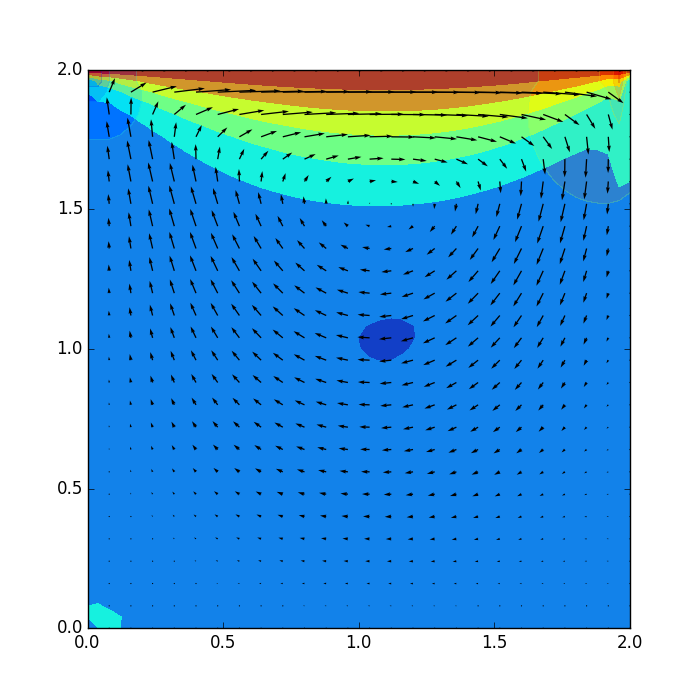

In [22]:
from IPython.display import Image
Image(filename='Navier-Stokes_Cavity-Flow_Stable.png');